In [ ]:
import pandas as pd

file_path = '/kaggle/input/cloud-images-19510/train.csv'  
data = pd.read_csv(file_path)



In [ ]:
# # Display unique values in the DATE (MM/DD) column
# unique_dates = data['DATE (MM/DD)'].unique()
# print(unique_dates)


In [ ]:
from __future__ import absolute_import,division , print_function, unicode_literals
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
mpl.rcParams['figure.figsize']=(8,6)
mpl.rcParams['axes.grid']= False

In [ ]:
data.isnull().sum()

In [ ]:
data.duplicated().sum()

In [ ]:
# Drop rows where all columns have null values
Df = data.dropna(how='all')

In [ ]:
print(Df.duplicated().sum())
print(Df.shape)

In [ ]:
Df.isnull().sum()

In [ ]:
import pandas as pd

# Convert 'MST' column to datetime format
Df['MST'] = pd.to_datetime(Df['MST'])

# Extract hour and minute from datetime column
Df['Hour'] = Df['MST'].dt.hour
Df['Minute'] = Df['MST'].dt.minute

# Drop the original 'MST' column
Df.drop(columns=['MST'], inplace=True)

Df.info()


In [ ]:
# Make a copy of the DataFrame excluding the 'DATE (MM/DD)' column
df_copy = Df.drop(columns=['DATE (MM/DD)']).copy()

# Verify the copy
print(df_copy.info())


In [ ]:
df_copy.corr()['Total Cloud Cover [%]']

In [ ]:
# # Strong Relation 
# Albedo (CMP11)

# # Moderate Relation
# Global CMP22 (vent/cor) [W/m^2]
# Tower Dry Bulb Temp [deg C]
# Tower Wet Bulb Temp [deg C]
# Tower Dew Point Temp [deg C]
# Avg Wind Direction @ 6ft [deg from N]


# # Weak Relation 
# Direct sNIP [W/m^2]:
# Azimuth Angle [degrees]:
# Tower RH [%]
# Peak Wind Speed @ 6ft [m/s]
# Station Pressure [mBar]
# Precipitation (Accumulated) [mm]
# Snow Depth [cm]
# Moisture
# Hour
# Minute


In [ ]:
plt.hist(Df['Total Cloud Cover [%]'],bins=10)

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 4))
sns.scatterplot(data=Df, x='Hour', y='Total Cloud Cover [%]')



In [ ]:
from dateutil import parser
# Function to standardize date format using dateutil.parser
def standardize_date(date):
    try:
        parsed_date = parser.parse(date, dayfirst=False)
        return pd.Timestamp(year=2024, month=parsed_date.month, day=parsed_date.day)
    except ValueError as e:
        print(f"Error parsing date: {date}, error: {e}")
        return None

# Apply the function to the 'DATE (MM/DD)' column
Df['DATE (MM/DD)'] = Df['DATE (MM/DD)'].apply(standardize_date)

# Combine 'DATE (MM/DD)', 'Hour', and 'Minute' into a single datetime column
Df['Datetime'] = Df['DATE (MM/DD)'] + pd.to_timedelta(Df['Hour'], unit='h') + pd.to_timedelta(Df['Minute'], unit='m')

# Ensure the DataFrame is a proper copy
Df = Df.copy()

# Set the 'Datetime' column as the index
Df.set_index('Datetime', inplace=True)

# Ensure the DataFrame is sorted by the datetime index
Df.sort_index(inplace=True)

# Perform time-based interpolation
Df['Total Cloud Cover [%]'] = Df['Total Cloud Cover [%]'].interpolate(method='time')

# Reset index if you need to keep 'Datetime' as a column
Df.reset_index(inplace=True)

# Drop the 'Datetime' column if you no longer need it
Df.drop(columns=['Datetime'], inplace=True)

# Check the DataFrame
print(Df)

In [ ]:
# Display unique values in the DATE (MM/DD) column
unique_dates = Df['DATE (MM/DD)'].unique()
print(unique_dates)


In [ ]:
# import pandas as pd

# # Assuming 'df' is your preprocessed DataFrame with datetime index
# # Sort the DataFrame by the datetime index if it's not already sorted
# Df.sort_index(inplace=True)

# # Define the time intervals for prediction
# prediction_intervals = [15, 25, 30]

# # Create lagged features for the last 6 hours of Total Cloud Cover [%] data
# for interval in prediction_intervals:
#     Df[f'Total Cloud Cover [%] (t-{interval}min)'] = Df['Total Cloud Cover [%]'].shift(interval // 5)

# # Drop rows with NaN values resulting from shifting
# Df.dropna(inplace=True)


In [ ]:
Df.info()

In [ ]:
# Assuming you want to find rows where 'Column1' has value 'value1' and 'Column2' has value 'value2'
# Replace 'Column1', 'value1', 'Column2', and 'value2' with your column names and values

# Boolean indexing to filter rows based on the specified condition
filtered_rows = Df[(Df['DATE (MM/DD)'] == '2024-01-01 00:00:00') & (Df['Hour'] == 14)& (Df['Minute'] == 19)]

print(filtered_rows)



In [ ]:
# # Assuming your DataFrame is named 'df' and you want to save it with a new filename

# # Specify the new filename
# new_filename = 'Train_Imputed.csv'

# # Use the to_csv() method to save the DataFrame with the new filename
# Df.to_csv(new_filename, index=False)  # Set index=False to avoid saving the index as a separate column


In [ ]:
# import os
# import json

# from kaggle_secrets import UserSecretsClient
# secrets = UserSecretsClient()

# os.environ['KAGGLE_USERNAME'] = secrets.get_secret("KAGGLE_USERNAME")
# os.environ['KAGGLE_KEY'] = secrets.get_secret("KAGGLE_KEY")

# !cp -r /kaggle/input/cloud-images-19510/ /kaggle/working/

# meta = dict(
#     id="ishansrivastava1308/Cloud-Images-19510",
#     title="Cloud images Dataset",
#     isPrivate=False,
#     licenses=[dict(name="other")]
# )

# with open(os.path.join('/kaggle/working/cloud-images-19510','dataset-metadata.json'), 'w') as f:
#     json.dump(meta, f)
    

# !kaggle datasets version -m "Version 5  Update" -p /kaggle/working/cloud-images-19510 --dir-mode tar

In [ ]:
import pandas as pd

dataframe = pd.read_csv('/kaggle/input/cloud-images-19510/train_shell_remake.csv')



In [ ]:
unique_dates = dataframe['DATE (MM/DD)'].unique()
print(unique_dates)


# **Imputation by Interpolation**

In [ ]:

# Combine DATE and MST into a single datetime column (without adding a year)
dataframe['datetime'] = pd.to_datetime('2024 ' + dataframe['DATE (MM/DD)'] + ' ' + dataframe['MST'], format='%Y %m/%d %H:%M')

# Set the datetime column as the index
dataframe.set_index('datetime', inplace=True)

# Interpolate the missing values
dataframe['Total Cloud Cover [%]'] = dataframe['Total Cloud Cover [%]'].interpolate(method='time')

# Reset the index to get the datetime column back into the dataframe
dataframe.reset_index(inplace=True)

# Extract DATE and MST from the datetime column
dataframe['DATE (MM/DD)'] = dataframe['datetime'].dt.strftime('%m/%d')
dataframe['MST'] = dataframe['datetime'].dt.strftime('%H:%M')

# Drop the datetime column
dataframe.drop(columns=['datetime'], inplace=True)

# Display the dataframe to see the changes
print(dataframe)

In [ ]:
dataframe.head()

In [ ]:
dataframe.info()

In [ ]:
filtered_rows = dataframe[(dataframe['DATE (MM/DD)'] == '01/01') & (dataframe['MST']== '14:20')]

print(filtered_rows)

In [ ]:
directory_path = '/kaggle/working/cloud-images-19510'

# Ensure the directory exists
if not os.path.exists(directory_path):
    os.makedirs(directory_path)

# Specify the full path for the new CSV file
new_filepath = os.path.join(directory_path, 'train_shell_remake_imputed.csv')

# Save the DataFrame to the specified path
dataframe.to_csv(new_filepath, index=False)  # Set index=False to avoid saving the index as a separate column

# Print confirmation message
print(f"File saved to {new_filepath}")

In [ ]:
import os
import json

from kaggle_secrets import UserSecretsClient
secrets = UserSecretsClient()

os.environ['KAGGLE_USERNAME'] = secrets.get_secret("KAGGLE_USERNAME")
os.environ['KAGGLE_KEY'] = secrets.get_secret("KAGGLE_KEY")

!cp -r /kaggle/input/cloud-images-19510/ /kaggle/working/

meta = dict(
    id="ishansrivastava1308/Cloud-Images-19510",
    title="Cloud images Dataset",
    isPrivate=False,
    licenses=[dict(name="other")]
)

with open(os.path.join('/kaggle/working/cloud-images-19510','dataset-metadata.json'), 'w') as f:
    json.dump(meta, f)
    

!kaggle datasets version -m "Version 5  Update" -p /kaggle/working/cloud-images-19510 --dir-mode tar

# **FEATURE ENGINEERING**


In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv("/kaggle/input/cloud-images-19510/train_shell_remake_imputed.csv")
print(df.shape)
print(df.info())
df.head()


(482400, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482400 entries, 0 to 482399
Data columns (total 17 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   DATE (MM/DD)                           482400 non-null  object 
 1   MST                                    482400 non-null  object 
 2   Global CMP22 (vent/cor) [W/m^2]        482400 non-null  float64
 3   Direct sNIP [W/m^2]                    482400 non-null  float64
 4   Azimuth Angle [degrees]                482400 non-null  float64
 5   Tower Dry Bulb Temp [deg C]            482400 non-null  float64
 6   Tower Wet Bulb Temp [deg C]            482400 non-null  float64
 7   Tower Dew Point Temp [deg C]           482400 non-null  float64
 8   Tower RH [%]                           482400 non-null  float64
 9   Total Cloud Cover [%]                  482400 non-null  float64
 10  Peak Wind Speed @ 6ft [m/s]            4824

,DATE (MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11)
0,01/01,00:00,-0.962276,0.000000,356.85640,7.216,0.988,-7.312,32.33,0.0,9.95,271.3,806.779,0.0,0.219,0.0,0.0
1,01/01,00:01,-0.937921,0.000000,357.65505,7.251,1.040,-7.260,32.40,0.0,8.20,272.9,806.840,0.0,0.206,0.0,0.0
2,01/01,00:02,-0.944395,0.000000,358.45438,7.256,1.093,-7.207,32.54,0.0,6.70,288.8,806.876,0.0,0.148,0.0,0.0
3,01/01,00:03,-0.951350,-0.029673,359.25416,7.254,1.060,-7.440,31.89,0.0,7.70,294.0,806.823,0.0,0.235,0.0,0.0
4,01/01,00:04,-0.934976,-0.054401,0.05415,7.331,1.081,-7.419,31.78,0.0,7.20,285.5,806.762,0.0,0.182,0.0,0.0


In [3]:
# Step 1: Check datatype and format of "MST" column
print(df['MST'].head())

0    00:00
1    00:01
2    00:02
3    00:03
4    00:04
Name: MST, dtype: object


In [4]:
# Step 1: Split 'MST' column into hours and minutes
df[['Hour', 'Minute']] = df['MST'].str.split(':', expand=True)

# Step 2: Convert hours and minutes to numeric values
df['Hour'] = pd.to_numeric(df['Hour'])
df['Minute'] = pd.to_numeric(df['Minute'])

# Step 3: Calculate minutes since midnight
df['Minutes_since_midnight'] = df['Hour'] * 60 + df['Minute']

# Optional: Drop the intermediate 'Hour' and 'Minute' columns if not needed
df.drop(['Hour', 'Minute'], axis=1, inplace=True)


df.head()

,DATE (MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11),Minutes_since_midnight
0,01/01,00:00,-0.962276,0.000000,356.85640,7.216,0.988,-7.312,32.33,0.0,9.95,271.3,806.779,0.0,0.219,0.0,0.0,0
1,01/01,00:01,-0.937921,0.000000,357.65505,7.251,1.040,-7.260,32.40,0.0,8.20,272.9,806.840,0.0,0.206,0.0,0.0,1
2,01/01,00:02,-0.944395,0.000000,358.45438,7.256,1.093,-7.207,32.54,0.0,6.70,288.8,806.876,0.0,0.148,0.0,0.0,2
3,01/01,00:03,-0.951350,-0.029673,359.25416,7.254,1.060,-7.440,31.89,0.0,7.70,294.0,806.823,0.0,0.235,0.0,0.0,3
4,01/01,00:04,-0.934976,-0.054401,0.05415,7.331,1.081,-7.419,31.78,0.0,7.20,285.5,806.762,0.0,0.182,0.0,0.0,4


In [5]:
print(df.shape)
print(df.info())
df.head(12)

(482400, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482400 entries, 0 to 482399
Data columns (total 18 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   DATE (MM/DD)                           482400 non-null  object 
 1   MST                                    482400 non-null  object 
 2   Global CMP22 (vent/cor) [W/m^2]        482400 non-null  float64
 3   Direct sNIP [W/m^2]                    482400 non-null  float64
 4   Azimuth Angle [degrees]                482400 non-null  float64
 5   Tower Dry Bulb Temp [deg C]            482400 non-null  float64
 6   Tower Wet Bulb Temp [deg C]            482400 non-null  float64
 7   Tower Dew Point Temp [deg C]           482400 non-null  float64
 8   Tower RH [%]                           482400 non-null  float64
 9   Total Cloud Cover [%]                  482400 non-null  float64
 10  Peak Wind Speed @ 6ft [m/s]            4824

,DATE (MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11),Minutes_since_midnight
0,01/01,00:00,-0.962276,0.000000,356.85640,7.216,0.988,-7.312,32.33,0.0,9.95,271.3,806.779,0.0,0.219,0.0,0.0,0
1,01/01,00:01,-0.937921,0.000000,357.65505,7.251,1.040,-7.260,32.40,0.0,8.20,272.9,806.840,0.0,0.206,0.0,0.0,1
2,01/01,00:02,-0.944395,0.000000,358.45438,7.256,1.093,-7.207,32.54,0.0,6.70,288.8,806.876,0.0,0.148,0.0,0.0,2
3,01/01,00:03,-0.951350,-0.029673,359.25416,7.254,1.060,-7.440,31.89,0.0,7.70,294.0,806.823,0.0,0.235,0.0,0.0,3
4,01/01,00:04,-0.934976,-0.054401,0.05415,7.331,1.081,-7.419,31.78,0.0,7.20,285.5,806.762,0.0,0.182,0.0,0.0,4
5,01/01,00:05,-0.913492,-0.044510,0.85412,7.309,1.079,-7.221,32.38,0.0,7.70,280.8,806.655,0.0,0.116,0.0,0.0,5
6,01/01,00:06,-0.922662,-0.098911,1.65384,7.219,1.065,-7.335,32.26,0.0,7.95,280.2,806.538,0.0,0.182,0.0,0.0,6
7,01/01,00:07,-0.906123,-0.098910,2.45307,7.237,1.069,-7.331,32.23,0.0,6.45,279.7,806.595,0.0,0.153,0.0,0.0,7
8,01/01,00:08,-0.898426,-0.098910,3.25158,7.211,1.026,-7.274,32.45,0.0,8.20,293.6,806.554,0.0,0.225,0.0,0.0,8
9,01/01,00:09,-0.897701,-0.118692,4.04914,7.222,1.049,-7.251,32.49,0.0,8.95,285.8,806.448,0.0,0.141,0.0,0.0,9


In [6]:

dataframe = df.drop(['DATE (MM/DD)', 'MST'], axis=1)

In [7]:
dataframe.columns


Index(['Global CMP22 (vent/cor) [W/m^2]', 'Direct sNIP [W/m^2]',
       'Azimuth Angle [degrees]', 'Tower Dry Bulb Temp [deg C]',
       'Tower Wet Bulb Temp [deg C]', 'Tower Dew Point Temp [deg C]',
       'Tower RH [%]', 'Total Cloud Cover [%]', 'Peak Wind Speed @ 6ft [m/s]',
       'Avg Wind Direction @ 6ft [deg from N]', 'Station Pressure [mBar]',
       'Precipitation (Accumulated) [mm]', 'Snow Depth [cm]', 'Moisture',
       'Albedo (CMP11)', 'Minutes_since_midnight'],
      dtype='object')

In [8]:
# Define the lag period (6 hours = 360 minutes)
lag_period = 360

# List of columns to create lagged features for (excluding 'Minutes_since_midnight')
columns_to_lag = dataframe.columns.drop(['Minutes_since_midnight'])

# Create lagged features for all numeric columns except 'Minutes_since_midnight'
for column in columns_to_lag:
    for i in [15, 25, 30]:  # Lag periods for 15, 25, and 30 minutes
        dataframe[f'{column}_lag_{i}'] = dataframe[column].shift(i)

# Create lagged target variables for 'Total Cloud Cover [%]'
for i in [15, 25, 30]:
    dataframe[f'TotalCloudCover_lag_{i}'] = dataframe['Total Cloud Cover [%]'].shift(-i)

In [9]:
print(dataframe.shape)

(482400, 64)


In [10]:
#Drop rows with NaN values resulting from lagging
dataframe.dropna(inplace=True)


In [11]:
dataframe.shape

(482340, 64)

In [12]:
import pandas as pd

# Assuming `dataframe` is your DataFrame

# Combine the target variables into a single DataFrame
y_combined = pd.concat([dataframe['TotalCloudCover_lag_15'], dataframe['TotalCloudCover_lag_25'], dataframe['TotalCloudCover_lag_30']], axis=1)
y_combined.columns = ['15_min', '25_min', '30_min']

# Separate features (X) and combined target variables (y_combined)
X = dataframe.drop(columns=['Total Cloud Cover [%]', 'TotalCloudCover_lag_15', 'TotalCloudCover_lag_25', 'TotalCloudCover_lag_30'])

# Split into training and validation sets
split_index = int(len(X) * 0.8)  # 80% for training, 20% for validation
X_train, X_val = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_val = y_combined.iloc[:split_index], y_combined.iloc[split_index:]

# Add these lines here to normalize your target values
y_train = y_train / 100
y_val = y_val / 100

# Ensure your data is ready for training the model
print(f"Shape of X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Shape of X_val: {X_val.shape}, y_val: {y_val.shape}")


Shape of X_train: (385872, 60), y_train: (385872, 3)
Shape of X_val: (96468, 60), y_val: (96468, 3)


# **MODEL 1 - HYBRID MODEL ( CNN+LSTM+GRU)**

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Dense, LSTM, GRU, Conv1D, MaxPooling1D, GlobalAveragePooling1D, Concatenate, Dropout
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.layers import BatchNormalization

# Normalize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Reshape data for LSTM input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_val_reshaped = X_val_scaled.reshape((X_val_scaled.shape[0], X_val_scaled.shape[1], 1))

def weighted_accuracy(y_true, y_pred):
    accuracy_15 = tf.reduce_mean(tf.abs(y_true[:, 0] - y_pred[:, 0]))
    accuracy_25 = tf.reduce_mean(tf.abs(y_true[:, 1] - y_pred[:, 1]))
    accuracy_30 = tf.reduce_mean(tf.abs(y_true[:, 2] - y_pred[:, 2]))
    weighted_acc = 0.5 * accuracy_15 + 0.35 * accuracy_25 + 0.15 * accuracy_30
    return weighted_acc

# Register the custom metric
tf.keras.utils.get_custom_objects()['weighted_accuracy'] = weighted_accuracy



def create_hybrid_model(input_shape):
    inputs = Input(shape=input_shape)
    
    # CNN branch
    conv = Conv1D(filters=64, kernel_size=3, activation='relu')(inputs)
    conv = BatchNormalization()(conv)
    conv = MaxPooling1D(pool_size=2)(conv)
    conv = Conv1D(filters=128, kernel_size=3, activation='relu')(conv)
    conv = BatchNormalization()(conv)
    conv = GlobalAveragePooling1D()(conv)
    
    # LSTM branch
    lstm = LSTM(50, return_sequences=True)(inputs)
    lstm = BatchNormalization()(lstm)
    lstm = LSTM(50)(lstm)
    
    # GRU branch
    gru = GRU(50, return_sequences=True)(inputs)
    gru = BatchNormalization()(gru)
    gru = GRU(50)(gru)
    
    # Combine branches
    combined = Concatenate()([conv, lstm, gru])
    
    # Dense layers
    x = Dense(64, activation='relu')(combined)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    x = Dense(32, activation='relu')(x)
    x = BatchNormalization()(x)
    
    # Output layer
    outputs = Dense(3)(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    return model


# Create the model
input_shape = (X_train_reshaped.shape[1], X_train_reshaped.shape[2])
model = create_hybrid_model(input_shape)
# Compile model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mae', metrics=[weighted_accuracy])

In [ ]:
# Train model
history = model.fit(
    X_train_reshaped, y_train,
    validation_data=(X_val_reshaped, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)
    ],
    verbose=1
)

In [ ]:
# Predict
predictions = model.predict(X_val_reshaped)



# Calculate metrics
mse_15 = mean_squared_error(y_val.iloc[:, 0], predictions[:, 0])
mse_25 = mean_squared_error(y_val.iloc[:, 1], predictions[:, 1])
mse_30 = mean_squared_error(y_val.iloc[:, 2], predictions[:, 2])
r2_15 = r2_score(y_val.iloc[:, 0], predictions[:, 0])
r2_25 = r2_score(y_val.iloc[:, 1], predictions[:, 1])
r2_30 = r2_score(y_val.iloc[:, 2], predictions[:, 2])

print(f'MSE for 15 minutes ahead: {mse_15:.4f}')
print(f'MSE for 25 minutes ahead: {mse_25:.4f}')
print(f'MSE for 30 minutes ahead: {mse_30:.4f}')
print(f'R2 for 15 minutes ahead: {r2_15:.4f}')
print(f'R2 for 25 minutes ahead: {r2_25:.4f}')
print(f'R2 for 30 minutes ahead: {r2_30:.4f}')

# Calculate weighted average of MSE and R2
weighted_mse = 0.5 * mse_15 + 0.35 * mse_25 + 0.15 * mse_30
weighted_r2 = 0.5 * r2_15 + 0.35 * r2_25 + 0.15 * r2_30

print(f'Weighted Average MSE: {weighted_mse:.4f}')
print(f'Weighted Average R2: {weighted_r2:.4f}')

# **Visulaizing Performance**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import uniform_filter1d

def plot_actual_vs_predicted_advanced(actual, predicted, title, n_points=1000, window=50):
    # Convert both to numpy arrays
    actual = np.array(actual)
    predicted = np.array(predicted)
    
    if len(actual) > n_points:
        indices = np.linspace(0, len(actual)-1, n_points, dtype=int)
        actual = actual[indices]
        predicted = predicted[indices]
    
    # Calculate moving averages
    actual_ma = uniform_filter1d(actual, size=window)
    predicted_ma = uniform_filter1d(predicted, size=window)
    
    plt.figure(figsize=(15, 7))
    
    # Plot actual and predicted values
    plt.plot(actual, label='Actual', color='blue', alpha=0.3)
    plt.plot(predicted, label='Predicted', color='red', alpha=0.3)
    
    # Plot moving averages
    plt.plot(actual_ma, color='blue', linewidth=2, label='Actual (MA)')
    plt.plot(predicted_ma, color='red', linewidth=2, label='Predicted (MA)')
    
    # Highlight differences
    plt.fill_between(range(len(actual)), actual, predicted, color='gray', alpha=0.3, label='Difference')
    
    plt.title(title, fontsize=16)
    plt.xlabel('Data Point Index', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Call the function for each timeframe
plot_actual_vs_predicted_advanced(y_val.iloc[:, 0], predictions[:, 0], 
                                  'Actual vs Predicted Values (15 minutes ahead)')

plot_actual_vs_predicted_advanced(y_val.iloc[:, 1], predictions[:, 1], 
                                  'Actual vs Predicted Values (25 minutes ahead)')

plot_actual_vs_predicted_advanced(y_val.iloc[:, 2], predictions[:, 2], 
                                  'Actual vs Predicted Values (30 minutes ahead)')

In [ ]:
model.summary()

In [ ]:
from tensorflow.keras.models import load_model, save_model

# Define your desired path and filename
save_path = '/kaggle/working/SamayModels'  # Replace with your desired directory path
model_name = 'Hybrid_CNN_LSTM_GRU'  # Replace with your desired model filename (without extension)

# Save the model
save_model(model, save_path + model_name + '.keras')

print(f"Model saved to {save_path}{model_name}.keras")

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


# If you want to see the learning rate changes
plt.figure(figsize=(12, 6))
plt.plot(history.history['learning_rate'])
plt.title('Learning Rate')
plt.ylabel('Learning Rate')
plt.xlabel('Epoch')
plt.show()

# **MODEL 2 - CUSTOMIZE TRANSFORMER**

In [13]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Normalize the input features and target variables
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)
y_train_scaled = scaler_y.fit_transform(y_train)
y_val_scaled = scaler_y.transform(y_val)

# Reshape data for Transformer input (assuming 6 hours of data with multiple features)
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 6, -1))
X_val_reshaped = X_val_scaled.reshape((X_val_scaled.shape[0], 6, -1))


def weighted_mse(y_true, y_pred):
    mse_15 = tf.reduce_mean(tf.square(y_true[:, 0] - y_pred[:, 0]))
    mse_25 = tf.reduce_mean(tf.square(y_true[:, 1] - y_pred[:, 1]))
    mse_30 = tf.reduce_mean(tf.square(y_true[:, 2] - y_pred[:, 2]))
    
    weighted_mse = 0.5 * mse_15 + 0.3 * mse_25 + 0.2 * mse_30
    return weighted_mse



2024-06-22 07:51:54.724038: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-22 07:51:54.724133: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-22 07:51:54.876823: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs  # Residual connection

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res  # Residual connection

def build_model(input_shape, head_size, num_heads, ff_dim, num_transformer_blocks, mlp_units, dropout=0, mlp_dropout=0):
    inputs = layers.Input(shape=input_shape)
    x = inputs

    # Transformer Encoder blocks
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    # Global Average Pooling
    x = layers.GlobalAveragePooling1D()(x)

    # Multi-Layer Perceptron (MLP)
    for units in mlp_units:
        x = layers.Dense(units, activation='relu')(x)
        x = layers.Dropout(mlp_dropout)(x)

    # Output layer
    outputs = layers.Dense(3)(x)  # Assuming 3 output classes

    # Create model
    model = Model(inputs=inputs, outputs=outputs, name='transformer_model')

    return model

# Model parameters (simplified)
input_shape = (6, 10)  # Example input shape
head_size = 64
num_heads = 2
ff_dim = 32
num_transformer_blocks = 2
mlp_units = [64, 32]
mlp_dropout = 0.2
dropout = 0.1

# Build the model
model = build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout,
    mlp_dropout,
)


In [42]:
X_train_reshaped.shape[1:]

(6, 10)

In [43]:
# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss=weighted_mse,
    metrics=['mse']
)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 6, 10)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 6, 10)     │         20 │ input_layer[0][0] │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 6, 10)     │      5,514 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 6, 10)     │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 6, 10)     │          0 │ dropout_1[0][0],  │
│                     │                   │            │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 6, 10)     │         20 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 6, 32)     │        352 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 6, 32)     │          0 │ conv1d[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 6, 10)     │        330 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 6, 10)     │          0 │ conv1d_1[0][0],   │
│                     │                   │            │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 6, 10)     │         20 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 6, 10)     │      5,514 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 6, 10)     │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 6, 10)     │          0 │ dropout_4[0][0],  │
│                     │                   │            │ add_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 6, 10)     │         20 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 6, 32)     │        352 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 6, 32)     │          0 │ conv1d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 6, 10)     │        330 │ dropout_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 6, 10)     │          0 │ conv1d_3[0][0],   │
│                     │                   │            │ add_2[0][0]       │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 15,099 (58.98 KB)

 Trainable params: 15,099 (58.98 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Train the model
history = model.fit(
    X_train_reshaped,
    y_train_scaled,
    validation_data=(X_val_reshaped, y_val_scaled),
    epochs=100,
    batch_size=64,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)
    ],
    verbose=1
)


Epoch 1/100
  38/6030 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - loss: 1.0626 - mse: 1.0587 

I0000 00:00:1719042777.699703     108 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


6030/6030 ━━━━━━━━━━━━━━━━━━━━ 63s 7ms/step - loss: 0.4205 - mse: 0.4304 - val_loss: 0.0864 - val_mse: 0.0922 - learning_rate: 1.0000e-04
Epoch 2/100
6030/6030 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - loss: 0.1801 - mse: 0.1894 - val_loss: 0.0778 - val_mse: 0.0834 - learning_rate: 1.0000e-04
Epoch 3/100
6030/6030 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - loss: 0.1629 - mse: 0.1716 - val_loss: 0.0744 - val_mse: 0.0799 - learning_rate: 1.0000e-04
Epoch 4/100
6030/6030 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - loss: 0.1546 - mse: 0.1627 - val_loss: 0.0726 - val_mse: 0.0778 - learning_rate: 1.0000e-04
Epoch 5/100
6030/6030 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - loss: 0.1473 - mse: 0.1550 - val_loss: 0.0704 - val_mse: 0.0757 - learning_rate: 1.0000e-04
Epoch 6/100
6030/6030 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - loss: 0.1448 - mse: 0.1525 - val_loss: 0.0685 - val_mse: 0.0737 - learning_rate: 1.0000e-04
Epoch 7/100
6030/6030 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - loss: 0.1401 - mse: 0.1475 - val_loss: 0.0670 - val_ms

In [22]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [24]:
# Evaluate the model
train_predictions = model.predict(X_train_reshaped)
val_predictions = model.predict(X_val_reshaped)

# Inverse transform the predictions and actual values
train_predictions_original = scaler_y.inverse_transform(train_predictions)
val_predictions_original = scaler_y.inverse_transform(val_predictions)
y_train_original = scaler_y.inverse_transform(y_train_scaled)
y_val_original = scaler_y.inverse_transform(y_val_scaled)

# Calculate MSE and R2 for each timeframe
from sklearn.metrics import mean_squared_error, r2_score

for i, timeframe in enumerate(['15 min', '25 min', '30 min']):
    train_mse = mean_squared_error(y_train_original[:, i], train_predictions_original[:, i])
    train_r2 = r2_score(y_train_original[:, i], train_predictions_original[:, i])
    val_mse = mean_squared_error(y_val_original[:, i], val_predictions_original[:, i])
    val_r2 = r2_score(y_val_original[:, i], val_predictions_original[:, i])
    
    print(f"{timeframe} - Train MSE: {train_mse:.4f}, Train R2: {train_r2:.4f}")
    print(f"{timeframe} - Val MSE: {val_mse:.4f}, Val R2: {val_r2:.4f}")
    
    
# Calculate weighted average MSE and R2
weighted_train_mse = 0.5 * mean_squared_error(y_train_original[:, 0], train_predictions_original[:, 0]) + \
                     0.3 * mean_squared_error(y_train_original[:, 1], train_predictions_original[:, 1]) + \
                     0.2 * mean_squared_error(y_train_original[:, 2], train_predictions_original[:, 2])

weighted_val_mse = 0.5 * mean_squared_error(y_val_original[:, 0], val_predictions_original[:, 0]) + \
                   0.3 * mean_squared_error(y_val_original[:, 1], val_predictions_original[:, 1]) + \
                   0.2 * mean_squared_error(y_val_original[:, 2], val_predictions_original[:, 2])

weighted_train_r2 = 0.5 * r2_score(y_train_original[:, 0], train_predictions_original[:, 0]) + \
                    0.3 * r2_score(y_train_original[:, 1], train_predictions_original[:, 1]) + \
                    0.2 * r2_score(y_train_original[:, 2], train_predictions_original[:, 2])

weighted_val_r2 = 0.5 * r2_score(y_val_original[:, 0], val_predictions_original[:, 0]) + \
                  0.3 * r2_score(y_val_original[:, 1], val_predictions_original[:, 1]) + \
                  0.2 * r2_score(y_val_original[:, 2], val_predictions_original[:, 2])

print(f"Weighted Average Train MSE: {weighted_train_mse:.4f}")
print(f"Weighted Average Val MSE: {weighted_val_mse:.4f}")
print(f"Weighted Average Train R2: {weighted_train_r2:.4f}")
print(f"Weighted Average Val R2: {weighted_val_r2:.4f}")

12059/12059 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step
3015/3015 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
15 min - Train MSE: 0.0103, Train R2: 0.9197
15 min - Val MSE: 0.0066, Val R2: 0.9220
25 min - Train MSE: 0.0136, Train R2: 0.8941
25 min - Val MSE: 0.0089, Val R2: 0.8937
30 min - Train MSE: 0.0156, Train R2: 0.8783
30 min - Val MSE: 0.0104, Val R2: 0.8762
Weighted Average Train MSE: 0.0123
Weighted Average Val MSE: 0.0080
Weighted Average Train R2: 0.9037
Weighted Average Val R2: 0.9043


In [44]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 6, 10)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 6, 10)     │         20 │ input_layer[0][0] │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 6, 10)     │      5,514 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 6, 10)     │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 6, 10)     │          0 │ dropout_1[0][0],  │
│                     │                   │            │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 6, 10)     │         20 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 6, 32)     │        352 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 6, 32)     │          0 │ conv1d[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 6, 10)     │        330 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 6, 10)     │          0 │ conv1d_1[0][0],   │
│                     │                   │            │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 6, 10)     │         20 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 6, 10)     │      5,514 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 6, 10)     │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 6, 10)     │          0 │ dropout_4[0][0],  │
│                     │                   │            │ add_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 6, 10)     │         20 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 6, 32)     │        352 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 6, 32)     │          0 │ conv1d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 6, 10)     │        330 │ dropout_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 6, 10)     │          0 │ conv1d_3[0][0],   │
│                     │                   │            │ add_2[0][0]       │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 15,099 (58.98 KB)

 Trainable params: 15,099 (58.98 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
import tensorflow as tf


# Save the entire model to a directory
model.save('/kaggle/working/.keras')


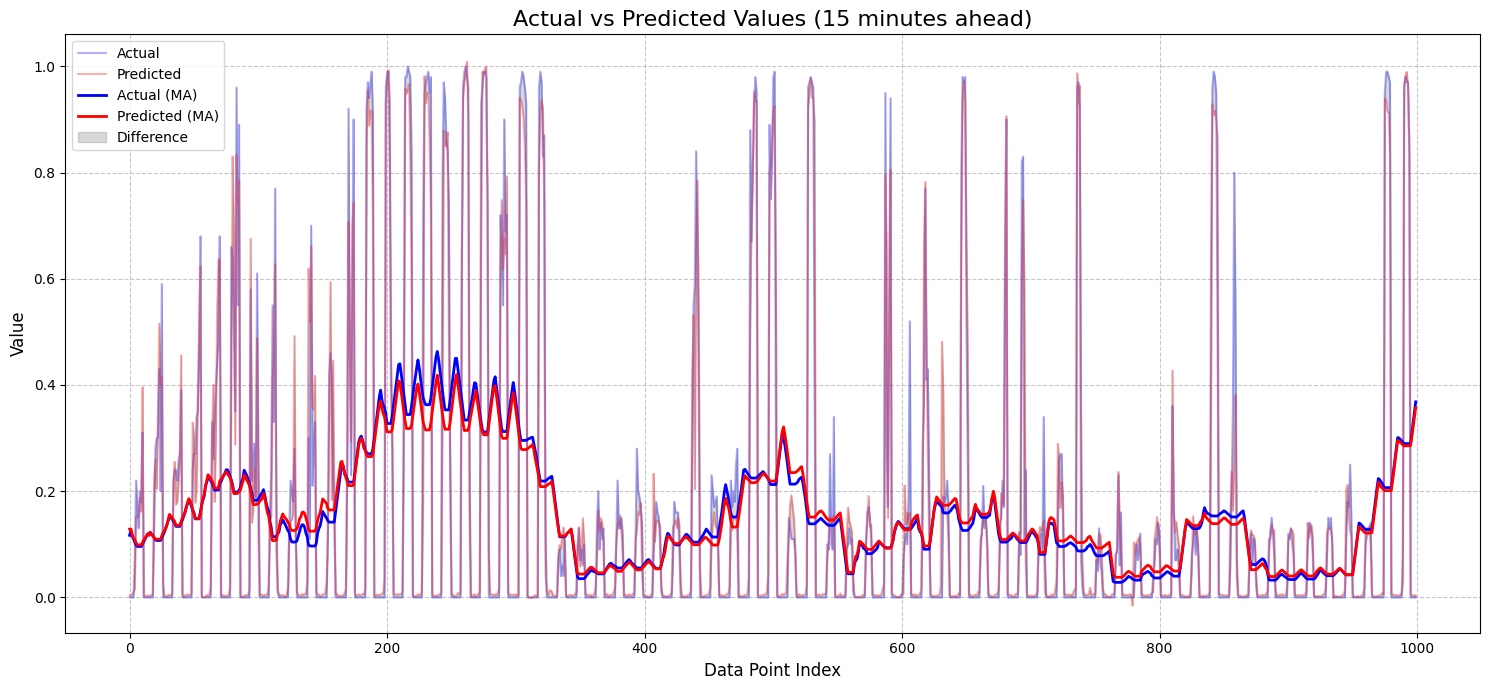

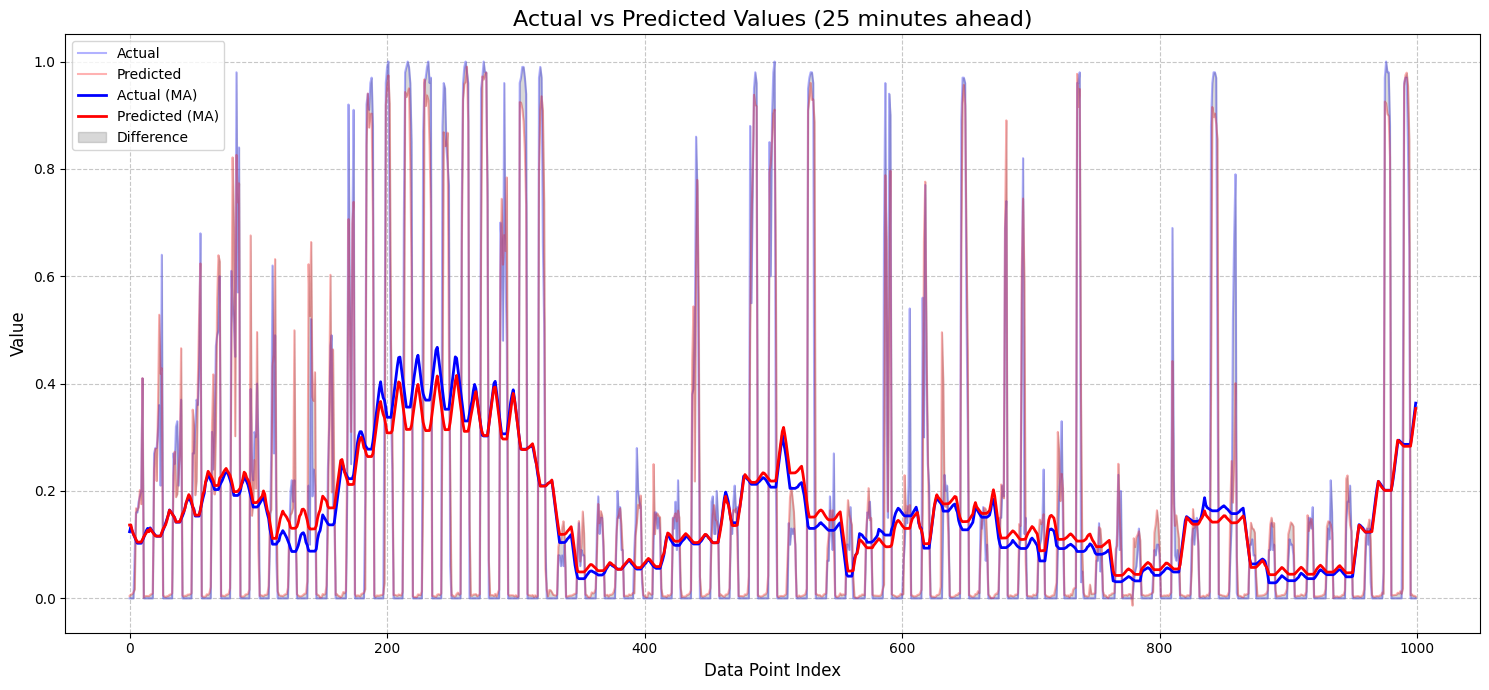

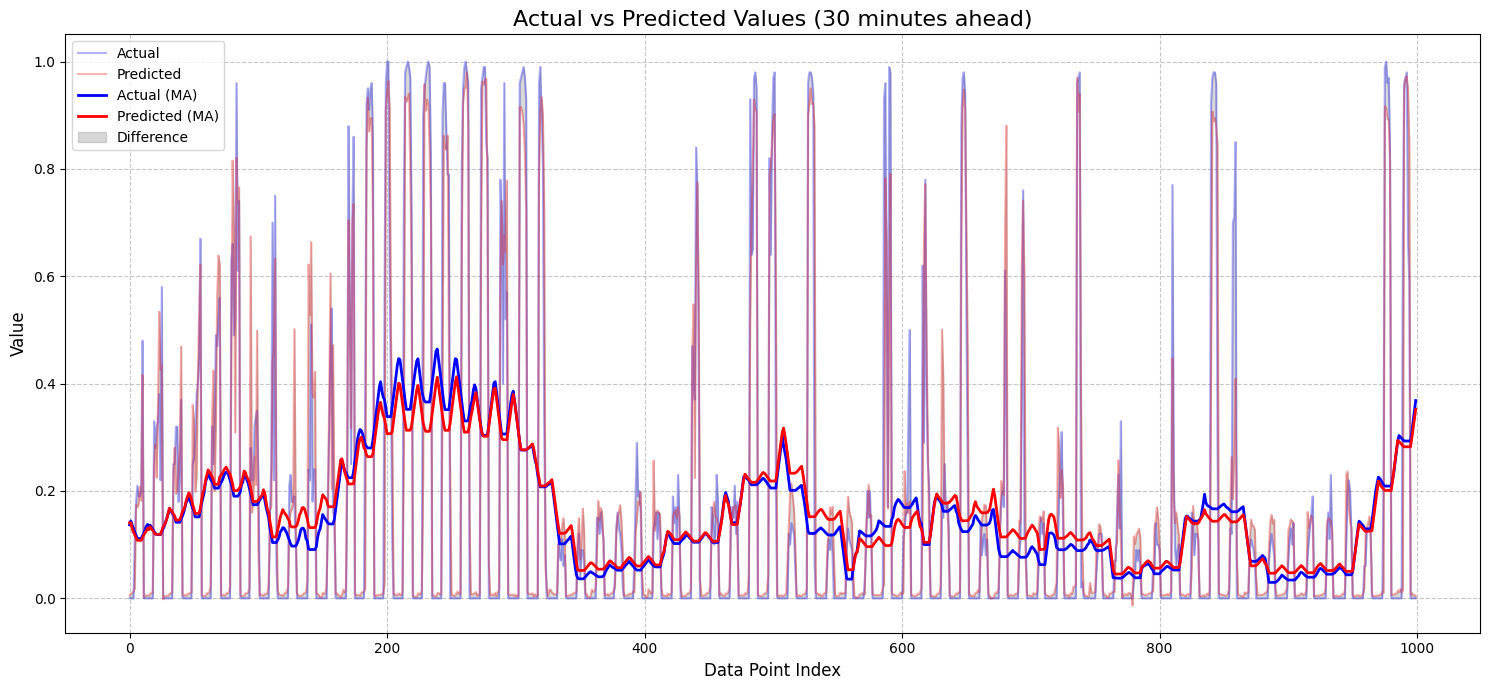

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import uniform_filter1d

def plot_actual_vs_predicted_advanced(actual, predicted, title, n_points=1000, window=50):
    # Convert both to numpy arrays
    actual = np.array(actual)
    predicted = np.array(predicted)
    
    if len(actual) > n_points:
        indices = np.linspace(0, len(actual)-1, n_points, dtype=int)
        actual = actual[indices]
        predicted = predicted[indices]
    
    # Calculate moving averages
    actual_ma = uniform_filter1d(actual, size=window)
    predicted_ma = uniform_filter1d(predicted, size=window)
    
    plt.figure(figsize=(15, 7))
    
    # Plot actual and predicted values
    plt.plot(actual, label='Actual', color='blue', alpha=0.3)
    plt.plot(predicted, label='Predicted', color='red', alpha=0.3)
    
    # Plot moving averages
    plt.plot(actual_ma, color='blue', linewidth=2, label='Actual (MA)')
    plt.plot(predicted_ma, color='red', linewidth=2, label='Predicted (MA)')
    
    # Highlight differences
    plt.fill_between(range(len(actual)), actual, predicted, color='gray', alpha=0.3, label='Difference')
    
    plt.title(title, fontsize=16)
    plt.xlabel('Data Point Index', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Assuming your variables are y_val_original and val_predictions_original

# Call the function for each timeframe
plot_actual_vs_predicted_advanced(y_val_original[:, 0], val_predictions_original[:, 0], 
                                  'Actual vs Predicted Values (15 minutes ahead)')

plot_actual_vs_predicted_advanced(y_val_original[:, 1], val_predictions_original[:, 1], 
                                  'Actual vs Predicted Values (25 minutes ahead)')

plot_actual_vs_predicted_advanced(y_val_original[:, 2], val_predictions_original[:, 2], 
                                  'Actual vs Predicted Values (30 minutes ahead)')


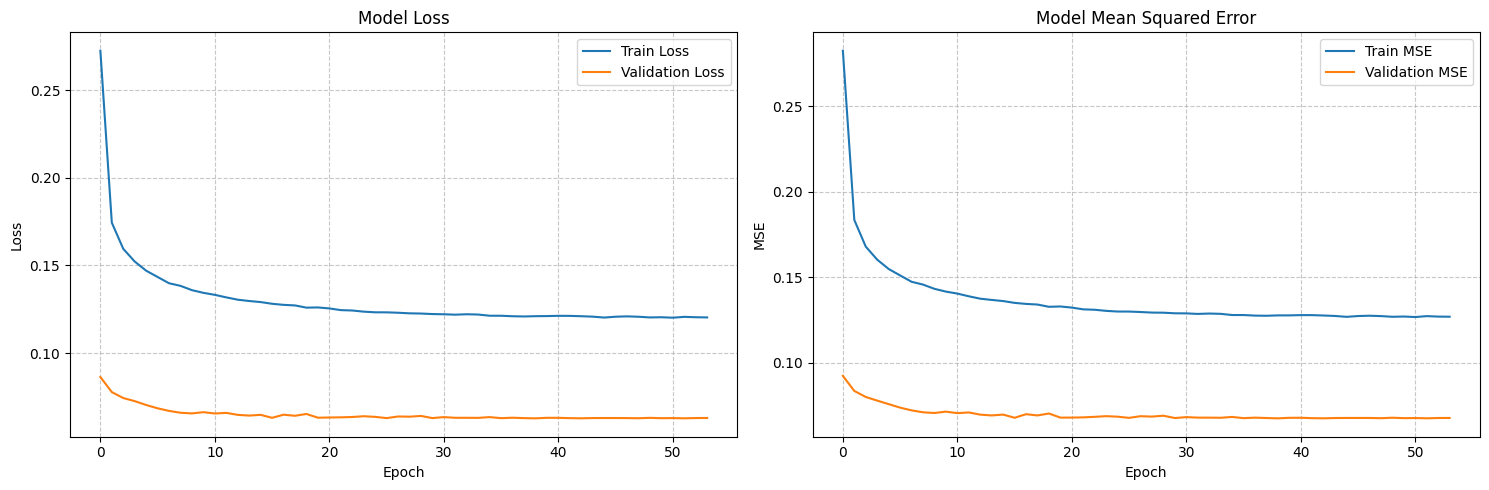

In [39]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Convert history.history dict to pandas DataFrame
    history_df = pd.DataFrame(history.history)

    # Plot training & validation loss values
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history_df['loss'], label='Train Loss')
    plt.plot(history_df['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Plot training & validation metrics
    plt.subplot(1, 2, 2)
    plt.plot(history_df['mse'], label='Train MSE')
    plt.plot(history_df['val_mse'], label='Validation MSE')
    plt.title('Model Mean Squared Error')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend(loc='upper right')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

# Call the function to plot the history
plot_training_history(history)


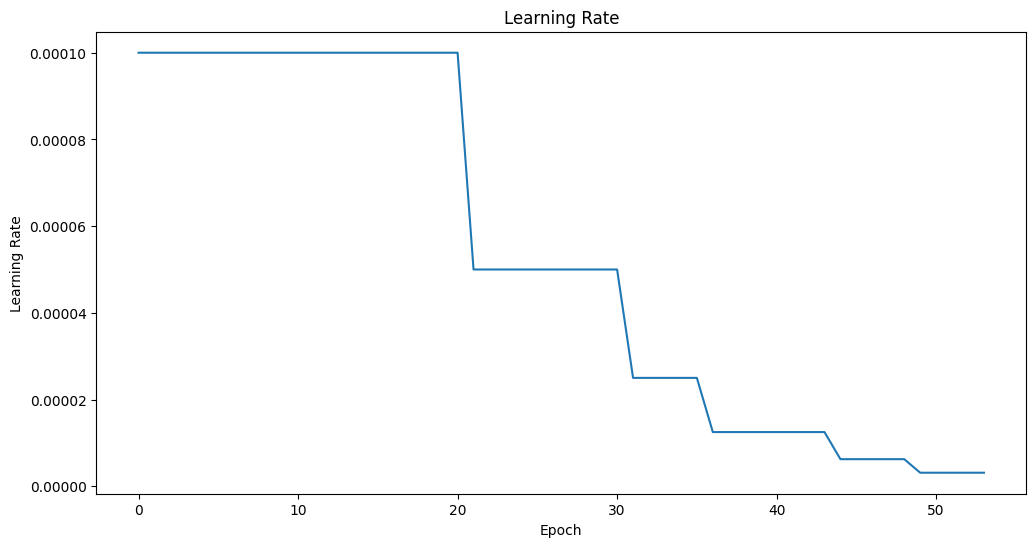

In [45]:
# If you want to see the learning rate changes
plt.figure(figsize=(12, 6))
plt.plot(history.history['learning_rate'])
plt.title('Learning Rate')
plt.ylabel('Learning Rate')
plt.xlabel('Epoch')
plt.show()

In [41]:
model.save('model.keras')  # Save the model in the current directory
